Engy-4340: Nuclear Reactor Theory Fall 2023 UMass Lowell; Prof. V. F. de Almeida **11Dec2023**

# 01. Nuclear Reactor Point Dynamics: Constant Reactivity, Variable Source 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Degrees of Freedom](#dof)
* [Steady State](#ss)
* [Vector ODE System](#vodes)
* [Function library](#flib)
* [One-Group Energy Neutron Balance](#nbal)
* [Reactivity Step Change w/o Source](#rhostep)
  - Super-critical
  - Sub-critical
* Pulsed Source
  - [Critical](#cpulsedq)
  - [Sub-critical](#sbcpulsedq)
  - [Super-Critical Booster](#spcpulsedq)
* [Sudden Insertion of Steady Source, Critical](#qinsert)
* [Sudden Removal of Steady Source, Sub-Critical](#qremove)
* [Frequency Response to Source Fluctuation, Sub-Critical](#freqresp)
   - [Fourier Modal Analysis](#modes)
* [Interactive Results](#ires)
---

## Objectives<a id="obj"></a>
+ Use one-group energy, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with constant reactivity.
+ Step change in reactivity.
+ Source impulse response.
+ Insertion/removal of a steady source.
+ Frequency response to fluctuating source strength.

## Introduction<a id="intro"></a>

In-class course notes.

A summary of this topic can be found in the textbooks: 

+ *Fundamentals of Nuclear Science and Engineering*, J. K. Shutils and R. E. Faw, CRC, 2017, 3$^\text{rd}$ edition, 638 pp., Chapter 10.

+ *Introduction to Nuclear Engineering*, J. R. Lamarsh and A. J. Baratta, Pearson, 2018, 4$^\text{th}$ edition, 802 pp., Chapter 7.

Extensive background for this topic can be found in the textbook: *Dynamics of Nuclear Reactors*, David L. Hetrick, 1993, ANS, 542 pp. 

A power nuclear reactor is a heat generation device. In most cases, nuclear heat (heat generated by nuclear fission reactions) is then converted in work through a heat-work cycle on the heated fluid passed through the reactor (figure below). A very simplified modeling of all types of nuclear reactors has been developed in the early days of nuclear engineering. The point-reactor model is an introduction to the subject of nuclear reactor dynamics. It disregards space variations of the neutron density (*i.e.* it is a pointwise approach), it considers dynamics for a one-group energy of neutrons, it only applies to conditions when the reactor is near criticality and the nuclear fuel is nearly static. In this model, a pointwise neutron balance 
is performed using the main components of neutron transport, namely prompt fission, delayed fission, scattering, and absorption (figure below); scattering is taking into account in the diffusion limit.


![](images/point-reactor.png)

## Problem Statement<a id="ps"></a>

Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time (response) due to various practical conditions of a working nuclear reactor.

## Input Data<a id="data"></a>

Name                        | Parameter          | Value                | Unit             |
----------------------------|--------------------|----------------------|------------------| 
neutron generation time     | $\ell$             | $1\times 10^{-4}$    |  s               | 
delayed neutron fraction    | $\beta$            | $6.5\times 10^{-3}$  |  -               |


For thermal fission of $^{235}$U the following six-group delayed neutron precursors data is typically used (*Physics of Nuclear Kinetics*, G. R. Keepin, 1965, Addison-Wesley Pub. Co.):


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |

In [1]:
#'''Parameters dictionary container'''

params = dict()

params['gen_time']          = 1.0e-4  # s
params['beta']              = 6.5e-3  # 
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 

In [2]:
'''Weighted mean lifetime of delayed neutrons'''
import numpy as np

tau_mean = np.array(params['species_rel_yield']) @ (1./np.array(params['species_decay']))
print('weighted mean lifetime of delayed neutrons = %1.3e [s]'%tau_mean)

weighted mean lifetime of delayed neutrons = 1.303e+01 [s]


Compare the (prompt) neutron generation time $\ell$ to the weighted mean lifetime of delayed neutrons $\overline{\tau}$. The latter allows for the control of the reactor in acceptable times.

## One-Group Energy Neutron Balance<a id="nbal"></a>

The space-invariant neutron balance for the point-reactor model is

\begin{equation*}
\frac{\text{d}n}{\text{d}t}  = \frac{\rho-\beta}{\ell}\, n + \sum\limits_{i=1}^{6} \lambda_i\,c_i + q(t) ,
\end{equation*}

where the first term on the right side of the equation represents the net production of neutrons not accounting for delayed neutrons, and the second term accounts for the source of delayed neutrons considering 6 groups of delayed neutron emitters resulting from the fission of $^{235}$U nuclei. The last term on the right side is a time-dependent source. Therefore a balance of neutron emitter species is also necessary

\begin{equation*}
\frac{\text{d}c_i}{\text{d}t}  = \frac{\beta_i}{\ell}\, n - \lambda_i\,c_i ,
     \ \ \ \ \ \forall \ \ \ \ \  i=1,\ldots,6.
\end{equation*}

where the first term on the right side of the equation is the source of emitters as a function of the neutron number density $n(t)$, and the second term is the consumption rate of the emitter by radioactive decay obtained as a function of the product of the number concentration of the emmiter, $c_i(t)$, multiplied by its decay constant $\lambda_i$. Here the number concentration of of the $i$th emitter, $c_i$ is considered in terms of delayed neutron number density, hence the units are the same as $n$.

## Degrees of Freedom<a id="dof"></a>
There exists seven equations, the neutron density balance, and six neutron emitting species balance. There exists seven unknown variables, $n(t)$ and $c_i(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable given the initial conditions for the unknowns, and all the values of the parameters in the foregoing table.

## Steady State<a id="ss"></a>

Neutron density and delayed neutron precursor concentrations are related as follows:

\begin{align*}
n_\text{ss}  &= -\frac{q_\text{ss}\,\ell }{\rho_\text{ss} }
\\
c_{i_\text{ss}}  &= \frac{\beta_i}{\lambda_i\,\ell}\, n_\text{ss}   \ \ \ \ \forall \ \ \ \ i=1,\ldots,6 .
\end{align*}

In [3]:
'''Setup function for delayed neutron species concentrations at steady state'''

def setup_initial_conditions(params):
    
    # setup the steady state for the delayed-neutron precursors
    
    n_species = len(params['species_decay'])
    
    assert len(params['species_rel_yield']) == n_species
    
    import numpy as np
    c_vec_0 = np.zeros(n_species,dtype=np.float64) # initialize conentration vector

    species_decay = params['species_decay'] # retrieve list of decay constants
    lambda_vec    = np.array(species_decay) # create a numpy vector

    species_rel_yield = params['species_rel_yield']
    beta = params['beta']
    beta_vec = np.array(species_rel_yield) * beta  # create the beta_i's vector

    gen_time = params['gen_time'] # retrieve neutron generation time

    n_ss = params['n_ss']
    c_vec_ss = beta_vec/lambda_vec/gen_time * n_ss # compute the steady state precursors number density
    
    params['c_vec_ss'] = c_vec_ss
    
    # setup initial condition for variables
    params['n_0']     = n_ss
    params['c_vec_0'] = c_vec_ss
    params['rho_0']   = params['reactivity']
    
    return

## Vector ODE System<a id="vodes"></a>

Refer to course notes OneNote [ChEn-3170-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmY427F-dSBKkpfFOx4ikf8BVAlJXL5iep1g7V7hcTQxJQ?e=98c69b).

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3,u_4,u_5,u_6,u_7)$ is the state vector and we assign 

\begin{align*}
 u_1(t)&=n(t),\\
 u_2(t)&=c_1(t),\\
 u_3(t)&=c_2(t),\\
 u_4(t)&=c_3(t),\\
 u_5(t)&=c_4(t),\\
 u_6(t)&=c_5(t),\\
 u_7(t)&=c_6(t).
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t), f_4(\uvar,t), f_5(\uvar,t), f_6(\uvar,t), f_7(\uvar,t)\bigr)$ we assign 

\begin{align*}
 f_1 & = \frac{\rho-\beta}{\ell}\, u_1 + \sum\limits_{i=2}^{7} \lambda_i\,u_i + q(t), \\
 f_2 & = \frac{\beta_1}{\ell}\, u_1 - \lambda_1\,u_2, \\
 f_3 & = \frac{\beta_2}{\ell}\, u_1 - \lambda_2\,u_3, \\
 f_4 & = \frac{\beta_3}{\ell}\, u_1 - \lambda_3\,u_4, \\
 f_5 & = \frac{\beta_4}{\ell}\, u_1 - \lambda_4\,u_5, \\
 f_6 & = \frac{\beta_5}{\ell}\, u_1 - \lambda_5\,u_6, \\
 f_7 & = \frac{\beta_6}{\ell}\, u_1 - \lambda_6\,u_7 .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=n_0,\\
 u_2(0)&=c_{1_0},\\
 u_3(0)&=c_{2_0},\\
 u_4(0)&=c_{3_0},\\
 u_5(0)&=c_{4_0},\\
 u_6(0)&=c_{5_0},\\
 u_7(0)&=c_{6_0}
\end{align*}

where $n_0$ and $c_{i_0}$ are initial values for the unknowns given by the problem specification.

## Function Library <a id="flib"></a>

Functions used later in the notebook.

In [4]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q = 0.0
    q_0 = params['q_0']
    
    if t <= 1e-5: # small time value
        q = q_0
    else:
        q = 0.0
        
    return q

In [5]:
'''ODE function'''

def f_vec( time, u_vec, params ):  
    
    import numpy as np
    assert np.all(u_vec >= 0.0)
    
    n_dens = u_vec[0]
    
    gen_time = params['gen_time'] 
    beta     = params['beta']
    
    species_decay = params['species_decay']
    lambda_vec    = np.array(species_decay)
    
    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta
    
    assert len(lambda_vec)==len(beta_vec)
    
    rho_0 = params['rho_0']
    
    q_source_t = q_source(time, params)
         
    c_vec = u_vec[1:]
    
    n_species = len(lambda_vec)
    f_tmp = np.zeros(n_species+1,dtype=np.float64) # vector for f_vec return
    
    # neutron balance
    f_tmp[0] = (rho_0 - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    
    # loop over n species balance
    f_tmp[1:] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
   
    return f_tmp

In [6]:
'''Create the point-reactor run function'''

def run_point_reactor( f_vec, params ):

    from scipy.integrate import odeint # Load ODE solver package

    import numpy as np
    time_final = params['time_final']
    n_time_stamps = params['n_time_stamps']
    time_stamps = np.linspace(0.0, time_final, num=n_time_stamps) # create the time stamps for solution values
    params['time_stamps'] = time_stamps
    
    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

    n_0     = params['n_0']
    c_vec_0 = params['c_vec_0']
       
    # m-equation point reactor model
    n_species = len(c_vec_0)
    u_vec_0 = np.zeros(n_species+1,dtype=np.float64)
    
    u_vec_0[0]  = n_0
    u_vec_0[1:] = c_vec_0
            
    (u_vec_history, info_dict) = odeint( f_vec, u_vec_0, time_stamps,
                                         args=( params, ),
                                         rtol=1e-4, atol=1e-4, mxstep=max_n_steps_per_time_step,
                                         full_output=True, tfirst=True )

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

In [7]:
'''Plotting function definition'''

def plot_results( u_vec_history, semi_log=False, markers=False, precursors=True ):
    
    time_stamps = params['time_stamps']
        
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(14, 6))

    if precursors == True:
        
        ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
        color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
    
        for (j,color_id) in zip( range(u_vec_history[:,1:].shape[1]), color_ids ):
            color=plt.cm.nipy_spectral(color_id)
        
            ax2.plot(time_stamps,u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
        
        ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
        ax2.legend(loc='lower right',fontsize=12)
        if semi_log == True:
            ax2.set_yscale('log') # uncomment to plot y in log scale
        #ax2.grid(True)

    if markers==True:
        ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )
    else:
        ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',color='red',label=r'$n/n_0$' )

    ax1.set_xlabel(r'Time [s]',fontsize=16)
    ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    if semi_log == True:
        ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [8]:
'''Utility function to peak at results table'''

def peek( time, data, head=5, tail=5):  

    import pandas as pd
    pd.options.display.float_format = '{:.3e}'.format
    pd.set_option('display.expand_frame_repr', False)
    
    layout = {'time':time[:head]}
    layout['n'] = data[:head,0]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[:head,j]
    results = pd.DataFrame(layout)
    print(results)
    print('')
    
    layout = {'time':time[-tail:]}
    layout['n'] = data[-tail:,0]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[-tail:,j]
    results = pd.DataFrame(layout)
    print(results)
    print('')

## Reactivity Step Change w/o Source<a id="rhostep"></a>

Assuming a critical, steady-state reactor, without source, $q_\text{ss}=0$ , then $n_\text{ss}$ is arbitrary. 
Introducing a step-change (positive or negative) in relative reactivity or "dollar" reactivity, $\frac{\rho_0}{\beta}$, parameter, compute the evolution of the reactor from steady state.

In [9]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = .10 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

# setup remaining initial conditions
setup_initial_conditions(params)

In [10]:
'''Evolve the point-reactor'''

time_final    = 10 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

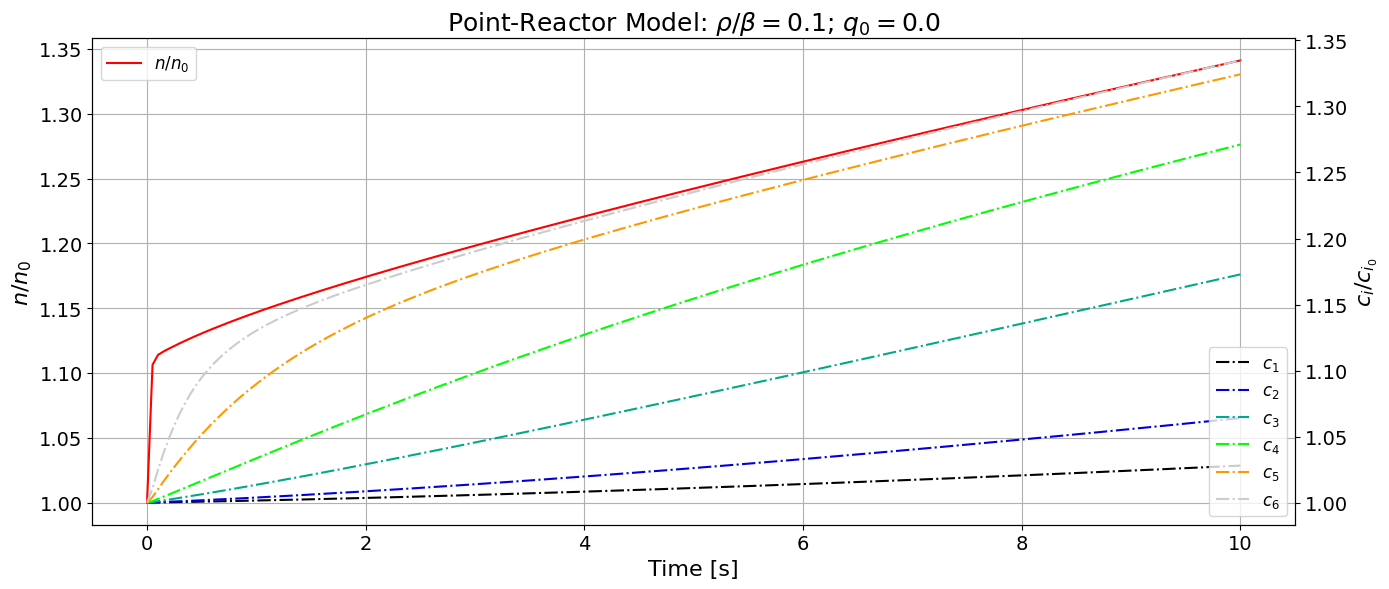

In [11]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [12]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 1.735e-01 3.002e+01 8.099e+01 1.992e+01 1.480e+01 1.138e+00 1.574e-01
1 5.025e-02 1.920e-01 3.002e+01 8.100e+01 1.993e+01 1.482e+01 1.143e+00 1.591e-01
2 1.005e-01 1.933e-01 3.002e+01 8.101e+01 1.994e+01 1.484e+01 1.149e+00 1.613e-01
3 1.508e-01 1.938e-01 3.002e+01 8.103e+01 1.995e+01 1.487e+01 1.156e+00 1.633e-01
4 2.010e-01 1.942e-01 3.003e+01 8.104e+01 1.996e+01 1.489e+01 1.163e+00 1.651e-01

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 9.799e+00 2.321e-01 3.084e+01 8.604e+01 2.328e+01 1.875e+01 1.503e+00 2.095e-01
1 9.849e+00 2.322e-01 3.084e+01 8.607e+01 2.330e+01 1.877e+01 1.504e+00 2.096e-01
2 9.899e+00 2.324e-01 3.085e+01 8.611e+01 2.332e+01 1.878e+01 1.505e+00 2.098e-01
3 9.950e+00 2.326e-01 3.085e+01 8.614e+01 2.334e+01 1.880e+01 1.506e+00 2.099e-01
4 1.000e+01 2.327e-01 3.086e+01 8.618e+01 2.336e+01 1.882e+01 1.507e+00 2.101e-01



In [13]:
'''For the die-hard'''

print(np.round(u_vec_history[:5,:],3))

[[ 0.174 30.018 80.99  19.917 14.802  1.138  0.157]
 [ 0.192 30.019 81.    19.925 14.819  1.143  0.159]
 [ 0.193 30.021 81.014 19.938 14.843  1.149  0.161]
 [ 0.194 30.024 81.028 19.95  14.868  1.156  0.163]
 [ 0.194 30.026 81.042 19.963 14.893  1.163  0.165]]


## Pulsed Source: Critical Reactor<a id="cpulsedq"></a>

Assuming a critical, steady-state reactor, $\rho_\text{ss}=0$, with no source, $q_\text{ss} = 0$, then, $n_\text{ss}$ is arbitrary.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [14]:
'''Setup up initial conditions'''

import numpy as np

rho_ss = 0.0
rho_0_over_beta = rho_ss # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # set the reactivity

params['n_ss'] = np.random.random() # arbitrary value at steady state

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 10/gen_time # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [15]:
'''Evolve the point-reactor'''

time_final    = 60 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

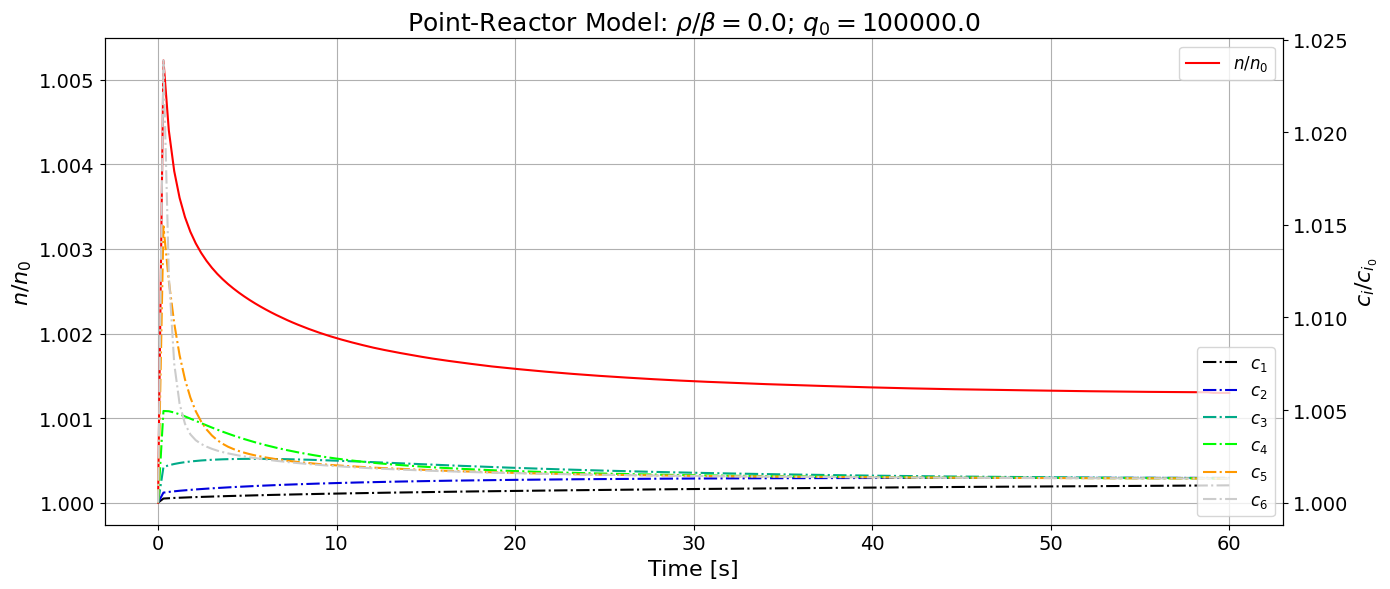

In [16]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [17]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 9.455e-01 1.636e+02 4.413e+02 1.085e+02 8.065e+01 6.200e+00 8.576e-01
1 3.015e-01 9.505e-01 1.636e+02 4.415e+02 1.087e+02 8.105e+01 6.292e+00 8.781e-01
2 6.030e-01 9.497e-01 1.636e+02 4.416e+02 1.087e+02 8.105e+01 6.274e+00 8.681e-01
3 9.045e-01 9.492e-01 1.636e+02 4.416e+02 1.088e+02 8.105e+01 6.260e+00 8.640e-01
4 1.206e+00 9.489e-01 1.636e+02 4.416e+02 1.088e+02 8.104e+01 6.249e+00 8.622e-01

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 5.879e+01 9.468e-01 1.637e+02 4.419e+02 1.087e+02 8.076e+01 6.208e+00 8.587e-01
1 5.910e+01 9.468e-01 1.637e+02 4.419e+02 1.087e+02 8.076e+01 6.208e+00 8.587e-01
2 5.940e+01 9.468e-01 1.637e+02 4.419e+02 1.087e+02 8.076e+01 6.208e+00 8.587e-01
3 5.970e+01 9.468e-01 1.637e+02 4.419e+02 1.087e+02 8.076e+01 6.208e+00 8.587e-01
4 6.000e+01 9.468e-01 1.637e+02 4.419e+02 1.087e+02 8.076e+01 6.208e+00 8.587e-01



## Pulsed Source: Sub-Critical Reactor <a id="sbcpulsedq"></a>

Assuming a sub-critical, steady-state reactor, $\rho_\text{ss}\lt 0$, then some corresponding source $q_\text{ss}$, produces $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [18]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta # set the reactivity
params['reactivity'] = rho_ss

n_ss = np.random.random() # pick an arbitray value for the steady state
params['n_ss'] = n_ss

gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = 1000 * q_ss # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [19]:
'''Evolve the point-reactor'''

time_final    = 100 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

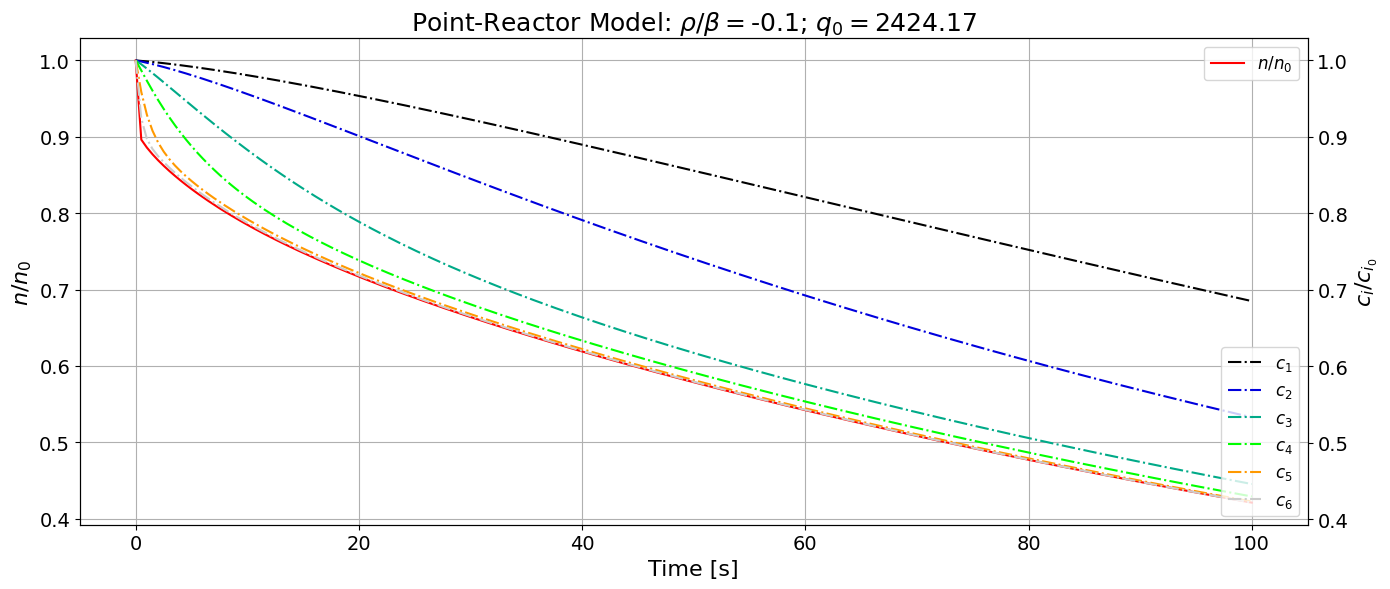

In [20]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [21]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 3.729e-01 6.451e+01 1.741e+02 4.281e+01 3.181e+01 2.445e+00 3.383e-01
1 5.025e-01 3.343e-01 6.448e+01 1.738e+02 4.259e+01 3.140e+01 2.345e+00 3.126e-01
2 1.005e+00 3.304e-01 6.443e+01 1.735e+02 4.235e+01 3.097e+01 2.272e+00 3.036e-01
3 1.508e+00 3.271e-01 6.439e+01 1.732e+02 4.210e+01 3.056e+01 2.221e+00 2.991e-01
4 2.010e+00 3.242e-01 6.434e+01 1.729e+02 4.184e+01 3.016e+01 2.183e+00 2.959e-01

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 9.799e+01 1.590e-01 4.464e+01 9.406e+01 1.934e+01 1.385e+01 1.048e+00 1.445e-01
1 9.849e+01 1.585e-01 4.454e+01 9.376e+01 1.928e+01 1.381e+01 1.045e+00 1.441e-01
2 9.899e+01 1.580e-01 4.443e+01 9.346e+01 1.922e+01 1.376e+01 1.042e+00 1.436e-01
3 9.950e+01 1.575e-01 4.432e+01 9.316e+01 1.916e+01 1.372e+01 1.039e+00 1.432e-01
4 1.000e+02 1.570e-01 4.422e+01 9.286e+01 1.910e+01 1.368e+01 1.035e+00 1.427e-01



## Pulsed Source: Super-Critical Booster<a id="spcpulsedq"></a>

Assuming a critical, steady-state reactor with no source, *i.e.*, $q_\text{ss}=0$, and $\rho_\text{ss}=0$, apply a booster to put it in a super-critical state, $\frac{\rho_0}{\beta} \gt 0$.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [22]:
'''Setup up initial conditions'''

import numpy as np

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1e-4/gen_time # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [23]:
'''Evolve the point-reactor'''

time_final    = 10 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

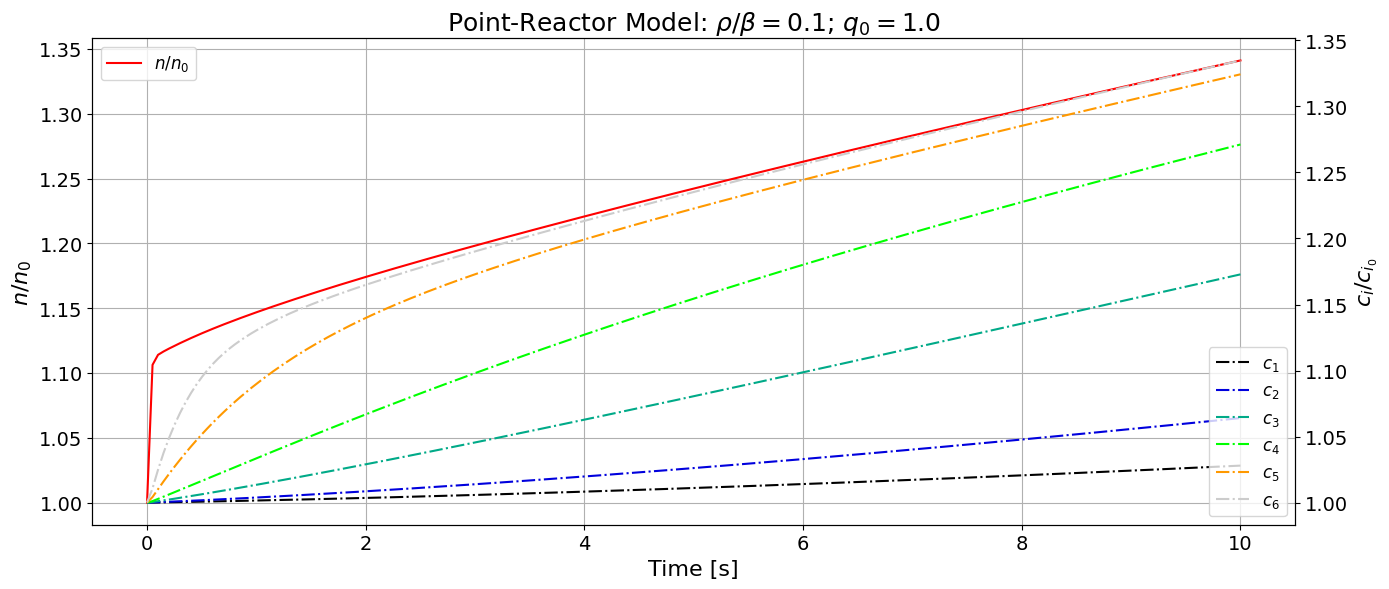

In [24]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [25]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 2.039e-01 3.527e+01 9.517e+01 2.340e+01 1.739e+01 1.337e+00 1.849e-01
1 5.025e-02 2.256e-01 3.528e+01 9.518e+01 2.341e+01 1.741e+01 1.343e+00 1.869e-01
2 1.005e-01 2.272e-01 3.528e+01 9.520e+01 2.343e+01 1.744e+01 1.351e+00 1.896e-01
3 1.508e-01 2.277e-01 3.528e+01 9.521e+01 2.344e+01 1.747e+01 1.359e+00 1.919e-01
4 2.010e-01 2.281e-01 3.528e+01 9.523e+01 2.346e+01 1.750e+01 1.366e+00 1.940e-01

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 9.799e+00 2.727e-01 3.623e+01 1.011e+02 2.736e+01 2.204e+01 1.766e+00 2.462e-01
1 9.849e+00 2.729e-01 3.624e+01 1.011e+02 2.738e+01 2.206e+01 1.767e+00 2.463e-01
2 9.899e+00 2.731e-01 3.625e+01 1.012e+02 2.741e+01 2.207e+01 1.768e+00 2.465e-01
3 9.950e+00 2.733e-01 3.626e+01 1.012e+02 2.743e+01 2.209e+01 1.769e+00 2.467e-01
4 1.000e+01 2.735e-01 3.626e+01 1.013e+02 2.745e+01 2.211e+01 1.771e+00 2.469e-01



## Sudden Insertion of Steady Source; Critical<a id="qinsert"></a>

Assuming a steady-state reactor with no source, $q_\text{ss}=0$, then $\rho_\text{ss}=0$, and $n_\text{ss}$ is undetermined. Then, a constant source is inserted at $t = 0$, $q(t)=Q_0$.

In [26]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q_0 = params['q_0']   
        
    return q_0

In [27]:
'''Setup up initial conditions'''

import numpy as np

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_ss = 0
params['reactivity'] = rho_ss 

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1e-2/gen_time   # constant source inserted

# setup remaining initial conditions
setup_initial_conditions(params)

In [28]:
'''Evolve the point-reactor'''

time_final    = 100 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

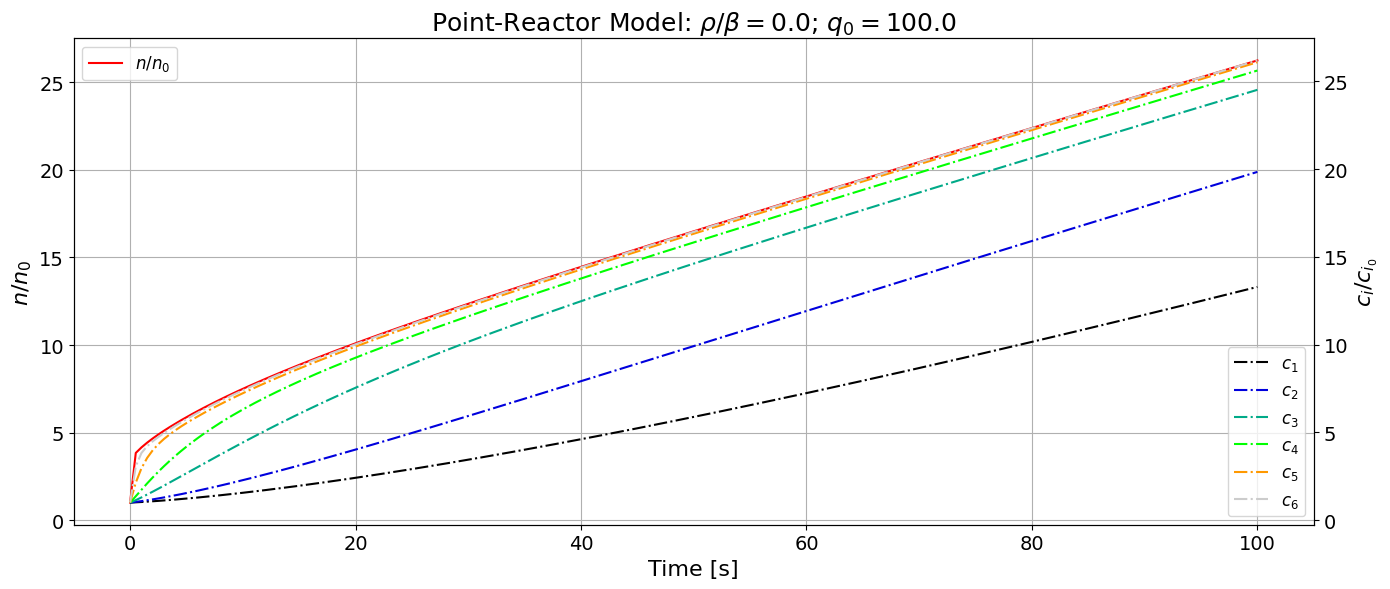

In [29]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [30]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 6.277e-01 1.086e+02 2.930e+02 7.205e+01 5.355e+01 4.116e+00 5.694e-01
1 5.025e-01 2.409e+00 1.103e+02 3.044e+02 8.210e+01 7.293e+01 8.793e+00 1.749e+00
2 1.005e+00 2.607e+00 1.123e+02 3.176e+02 9.329e+01 9.278e+01 1.217e+01 2.178e+00
3 1.508e+00 2.776e+00 1.145e+02 3.319e+02 1.050e+02 1.120e+02 1.458e+01 2.399e+00
4 2.010e+00 2.930e+00 1.169e+02 3.471e+02 1.171e+02 1.305e+02 1.641e+01 2.560e+00

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 9.799e+01 1.624e+01 1.408e+03 5.698e+03 1.738e+03 1.351e+03 1.058e+02 1.469e+01
1 9.849e+01 1.630e+01 1.417e+03 5.726e+03 1.745e+03 1.356e+03 1.062e+02 1.475e+01
2 9.899e+01 1.636e+01 1.425e+03 5.755e+03 1.752e+03 1.361e+03 1.066e+02 1.480e+01
3 9.950e+01 1.642e+01 1.434e+03 5.784e+03 1.759e+03 1.366e+03 1.070e+02 1.486e+01
4 1.000e+02 1.648e+01 1.443e+03 5.813e+03 1.766e+03 1.372e+03 1.074e+02 1.491e+01



In [31]:
params['q_0'] * gen_time / (gen_time + np.array(params['species_rel_yield'])*beta @ (1.0/np.array(params['species_decay'])))

0.11789075220819245

In [32]:
(u_vec_history[-5,0] - u_vec_history[-1,0])/(time_stamps[-5] - time_stamps[-1])

0.12066238565463308

In [33]:
gen_time / (gen_time + np.array(params['species_rel_yield'])*beta @ (1.0/np.array(params['species_decay'])))

0.0011789075220819244

In [34]:
params['q_0'] 

100.0

## Sudden Removal of Steady Source; Sub-Critical<a id="qremove"></a>

Assuming a steady-state, sub-critical reactor, $\rho_\text{ss}\lt 0$, then $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$ for some $q_\text{ss}$. The source is then removed at $t = 0$, $q(t)=0$. This is referred as a source-jerk method.

In [35]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta
params['reactivity'] = rho_ss 

params['n_ss'] = np.random.random() # pick an arbitray value for the steady state

params['q_0'] = 0.0

# setup remaining initial conditions
setup_initial_conditions(params)

In [36]:
'''Evolve the point-reactor'''

time_final    = 20 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

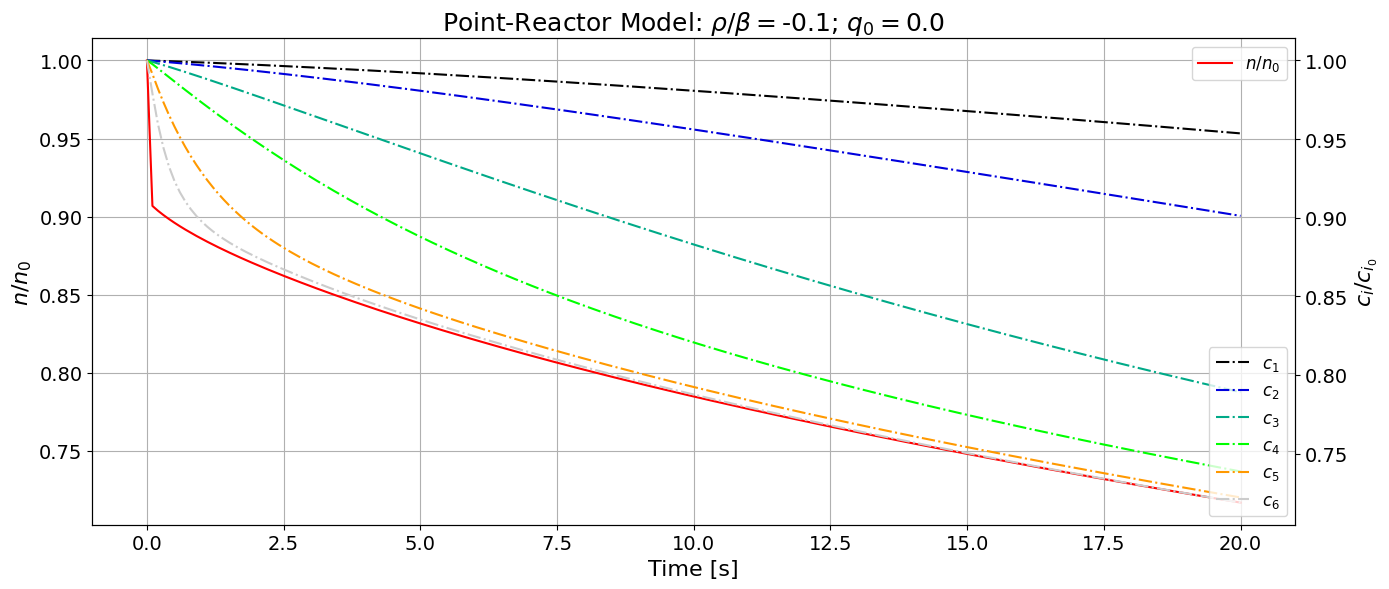

In [37]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [38]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 1.179e-01 2.040e+01 5.503e+01 1.353e+01 1.006e+01 7.732e-01 1.069e-01
1 1.005e-01 1.069e-01 2.040e+01 5.502e+01 1.352e+01 1.003e+01 7.665e-01 1.047e-01
2 2.010e-01 1.066e-01 2.039e+01 5.500e+01 1.351e+01 1.001e+01 7.593e-01 1.026e-01
3 3.015e-01 1.062e-01 2.039e+01 5.499e+01 1.349e+01 9.979e+00 7.526e-01 1.010e-01
4 4.020e-01 1.059e-01 2.039e+01 5.497e+01 1.348e+01 9.951e+00 7.464e-01 9.974e-02

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 1.960e+01 8.481e-02 1.948e+01 4.972e+01 1.072e+01 7.456e+00 5.602e-01 7.713e-02
1 1.970e+01 8.474e-02 1.947e+01 4.969e+01 1.071e+01 7.449e+00 5.597e-01 7.707e-02
2 1.980e+01 8.467e-02 1.946e+01 4.966e+01 1.070e+01 7.442e+00 5.592e-01 7.700e-02
3 1.990e+01 8.460e-02 1.946e+01 4.963e+01 1.069e+01 7.436e+00 5.588e-01 7.694e-02
4 2.000e+01 8.453e-02 1.945e+01 4.959e+01 1.068e+01 7.429e+00 5.583e-01 7.688e-02



## Frequency Response to Source Fluctuation, Sub-Critical<a id="freqresp"></a>

Assuming a steady-state, sub-critical reactor, $\frac{\rho_\text{ss}}{\beta}\lt 0$, with some source $q_\text{ss}$, corresponding to $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$,  apply a fluctuating source at $t = 0$, $q(t)=q_\text{ss} + \alpha\,\sin(2\pi\,w\,t)$ for a given cycle frequency $w$ (forcing frequency) and amplitude $\alpha$.

In [39]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source sinusoidal fluctuation.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. Must have a `'q_0'` key/value pair. Must have a `'source_cycle_freq'`
        key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    import math
    q_0   = params['q_0']
    w     = params['source_cycle_freq']
    alpha = params['source_amplitude']
    
    q = q_0 + alpha * math.sin(2*math.pi*w * t)
        
    return q

In [40]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1

beta = params['beta']  # retrieve the delayed neutron fraction

rho_ss = rho_ss_over_beta * beta
params['reactivity'] = rho_ss 

n_ss = np.random.random()
params['n_ss'] = n_ss # pick an arbitray value for the steady state

gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = q_ss

params['source_cycle_freq'] = 1/10 # 10-second period 
params['source_amplitude']  = q_ss * 0.5

# setup remaining initial conditions
setup_initial_conditions(params)

In [41]:
'''Evolve the point-reactor'''

time_final    = 50 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

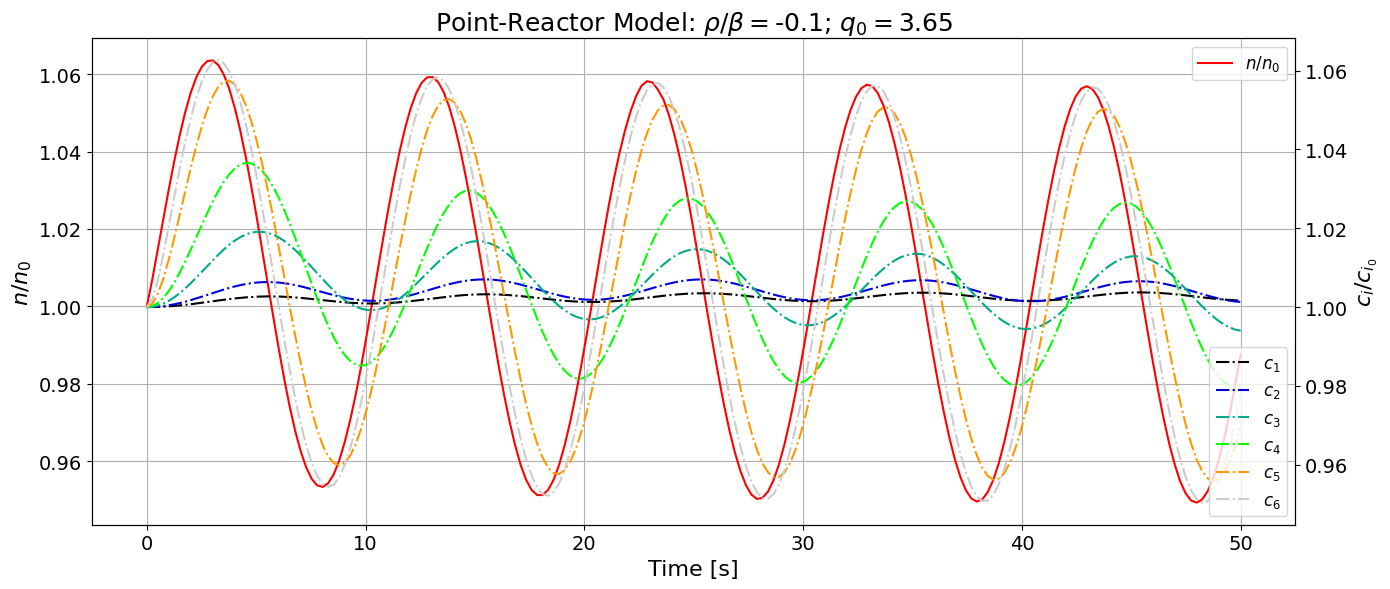

In [42]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history,precursors=True)

In [43]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 0.000e+00 5.611e-01 9.707e+01 2.619e+02 6.440e+01 4.786e+01 3.679e+00 5.089e-01
1 2.513e-01 5.651e-01 9.707e+01 2.619e+02 6.441e+01 4.788e+01 3.683e+00 5.099e-01
2 5.025e-01 5.694e-01 9.707e+01 2.619e+02 6.443e+01 4.791e+01 3.692e+00 5.124e-01
3 7.538e-01 5.738e-01 9.708e+01 2.620e+02 6.446e+01 4.797e+01 3.706e+00 5.157e-01
4 1.005e+00 5.781e-01 9.709e+01 2.620e+02 6.451e+01 4.806e+01 3.724e+00 5.194e-01

       time         n       c_1       c_2       c_3       c_4       c_5       c_6
0 4.899e+01 5.388e-01 9.726e+01 2.625e+02 6.418e+01 4.702e+01 3.519e+00 4.863e-01
1 4.925e+01 5.419e-01 9.725e+01 2.624e+02 6.412e+01 4.695e+01 3.525e+00 4.884e-01
2 4.950e+01 5.456e-01 9.724e+01 2.623e+02 6.407e+01 4.691e+01 3.535e+00 4.910e-01
3 4.975e+01 5.497e-01 9.723e+01 2.623e+02 6.404e+01 4.690e+01 3.549e+00 4.942e-01
4 5.000e+01 5.542e-01 9.723e+01 2.622e+02 6.402e+01 4.691e+01 3.567e+00 4.977e-01



### Fourier Modal Analysis<a id="modes"></a>

Fit the response as a linear combination of Fourier basis functions using the least-squares method. Compute the amplitudes of the modes and verify which modes are active.

The least-squares method with Fourier basis functions is a powerful computational tool for data fitting and data analysis, the course notes OneNote [ChEn-3170-gen-lsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Ep9qLSMssi1MjWvl2wYlTHkBSd5aUUoo1fIoe5pswIV0vA?e=Mhkd6f) collects elements of the theory (see also  [ChEn-3170](https://github.com/dpploy/chen-3170) Notebook 12). 

The Fourier expansion for approximating the response $n(t)$ is

\begin{equation*}
n(t) = \sum\limits_{k=0}^N \alpha_k\,\cos(k\,\mu\,t) + \beta_k\,\sin(k\,\mu\,t)
\end{equation*}

If we have a set of values of the independent variable $t_i, i=1,\ldots,m$, the above Fourier expression when applied to every $t_i$ gives

\begin{equation*}
\bvec = \Amtrx\,\xvec 
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
1 & \cos(\mu\,t_1) & \sin(\mu\,t_1) & \cos(2\mu\,t_1) & \sin(2\mu\,t_1) & \ldots & \cos(N\mu\,t_1) & \sin(N\mu\,t_1)  \\
1 & \cos(\mu\,t_2) & \sin(\mu\,t_2) & \cos(2\mu\,t_2) & \sin(2\mu\,t_2) & \ldots & \cos(N\mu\,t_2) & \sin(N\mu\,t_2)  \\
\vdots  & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & \cos(\mu\,t_m) & \sin(\mu\,t_m) & \cos(2\mu\,t_m) & \sin(2\mu\,t_m) & \ldots & \cos(N\mu\,t_m) & \sin(N\mu\,t_m)  \\
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \alpha_0 \\ 
  \alpha_1 \\
  \beta_1 \\
  \vdots \\
  \alpha_N \\
  \beta_N \\ 
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 n_1 \\ 
 n_2 \\ 
 \vdots  \\ 
 n_m \\ 
\end{pmatrix} $.

In [44]:
'''Set the parameters of the Fourier basis functions'''

import math
import numpy as np # Numpy is the numerical array package for Python

period = np.max(time_stamps) - np.min(time_stamps)  # [s]
omega  = 1/period                           # cycle frequency [1/s]
mu     = 2*math.pi * omega                  # radian frequency [rad/s]

n_pairs = 8

In [45]:
'''Function to build the Fourier matrix'''

def build_fourier_matrix( mu, n_pairs, abscissa_vec ):

    import numpy as np
    assert isinstance(n_pairs,int)
    assert isinstance(abscissa_vec,np.ndarray)
        
    a_mtrx = np.ones((abscissa_vec.size, 2*n_pairs + 1))

    for k in range(n_pairs+1):
        if k == 0:
            continue
        a_mtrx[:,2*k-1] = np.cos(k * mu * abscissa_vec)
        a_mtrx[:,2*k]   = np.sin(k * mu * abscissa_vec)

    return a_mtrx            

In [46]:
'''Build the Fourier algebraic system'''

a_mtrx = build_fourier_matrix( mu, n_pairs, time_stamps )

b_vec = np.array( u_vec_history[:,0]/params['n_0'] )

rank = np.linalg.matrix_rank(a_mtrx)
#print('rank(A) =',rank)
assert rank == 2*n_pairs+1

Build the Least-Squares normal equations and solve for the optimal coefficients of the fitting

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the Fourier modes, $\alpha_k\,\cos(k\,\mu\,A)$ and $\beta_k\,\sin(k\,\mu\,A)$.

In [47]:
x_vec = np.linalg.solve( a_mtrx.transpose()@a_mtrx, a_mtrx.transpose()@b_vec )

In [48]:
def response_fit( time ):
    '''
    Neutron density response function.

    Parameters
    ----------
    time: float or numpy.ndarray, required
        Time or an vector of time values.
   
    Returns
    -------
    value: float or numpy.ndarray
        Neutron density at time or times.

    Examples
    --------
    '''
    #assert np.min(mass_number) >= min(df['A']) and np.max(mass_number) <= max(df['A']),\
    #   'Out of range. Min = %r, max = %r, request_min = %r, request_max = %r'%\
    #   (min(df['A']), max(df['A']), np.min(mass_number), np.max(mass_number) )
    
    if np.min(time) < min(time_stamps) or np.max(time) > max(time_stamps):
        return False
    
    a_mtrx = build_fourier_matrix(mu, n_pairs, time )
    response_fit = a_mtrx @ x_vec
    
    response_fit[ response_fit<0 ] = 0.0 # correct for negative values in the curve fitting
        
    return response_fit

In [49]:
'''Function: plot the LS Fourier fit and all modes'''

def plot_fourier_fit( time_stamps, response, mu, x_vec, vert_offset=0.0, n_plot_pts=200, legend=True ):
    
    import matplotlib.pyplot as plt
    
    plt.figure(2, figsize=(12,6))

    # plot experimental data
    plt.plot( time_stamps, response,'r*',label='Response' )

    # plot LS Fourier fitting
    
    time_plot = np.linspace( time_stamps[0], time_stamps[-1], n_plot_pts )
    response_plot = response_fit( time_plot )
    assert response_plot is not False
    
    plt.plot( time_plot, response_plot, 'b:', label='LS Fourier fitting' )

    # plot each of the Fourier modes
    a_mtrx = build_fourier_matrix( mu, n_pairs, time_plot )
    from engy_4340.help import color_map
    colors = color_map(a_mtrx.shape[1])
    
    for j in range(a_mtrx.shape[1]):

        if j != 0:
            color=colors[j-1]
        
        if j == 0:
            color='black'
            k = 0
            label=r'$\alpha_{%i}$=%4.2e'%(k,x_vec[j])
            line_style = '-'  # cosine
        elif j%2 == 0:
            k = j/2
            label=r'$\beta_{%i}$(=%4.2e) sin($%i\mu t$)'%(k,x_vec[j],k)
            line_style = '--'  # cosine
        else:
            k = (j+1)/2
            label=r'$\alpha_{%i}$(=%4.2e) cos($%i\mu t$)'%(k,x_vec[j],k)
            line_style = '-'  # sine
        

        if j == 0:
            v_offset = 0
        else:
            v_offset = -vert_offset # improve visibility
        
        plt.plot(time_plot, x_vec[j]*a_mtrx[:,j]-v_offset,label=label,color=color,linestyle=line_style )
        
    plt.xlabel(r'Time [s]',fontsize=18)
    plt.ylabel(r'Response and Fit $n/n_0$',fontsize=18)
    plt.title('Reactor $^{235}_{92}$U (E=0.0253 eV)',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.25
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.02
    
    plt.text(x_text, y_text, 
             r'$\mu=$%8.2e [rad/s],   $N$=%i'%
             (mu,n_pairs),fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    if legend == True:
        plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1),fontsize=12)
    #plt.yscale('log')
    plt.grid(True)
    plt.show()
    print('')
    
    return

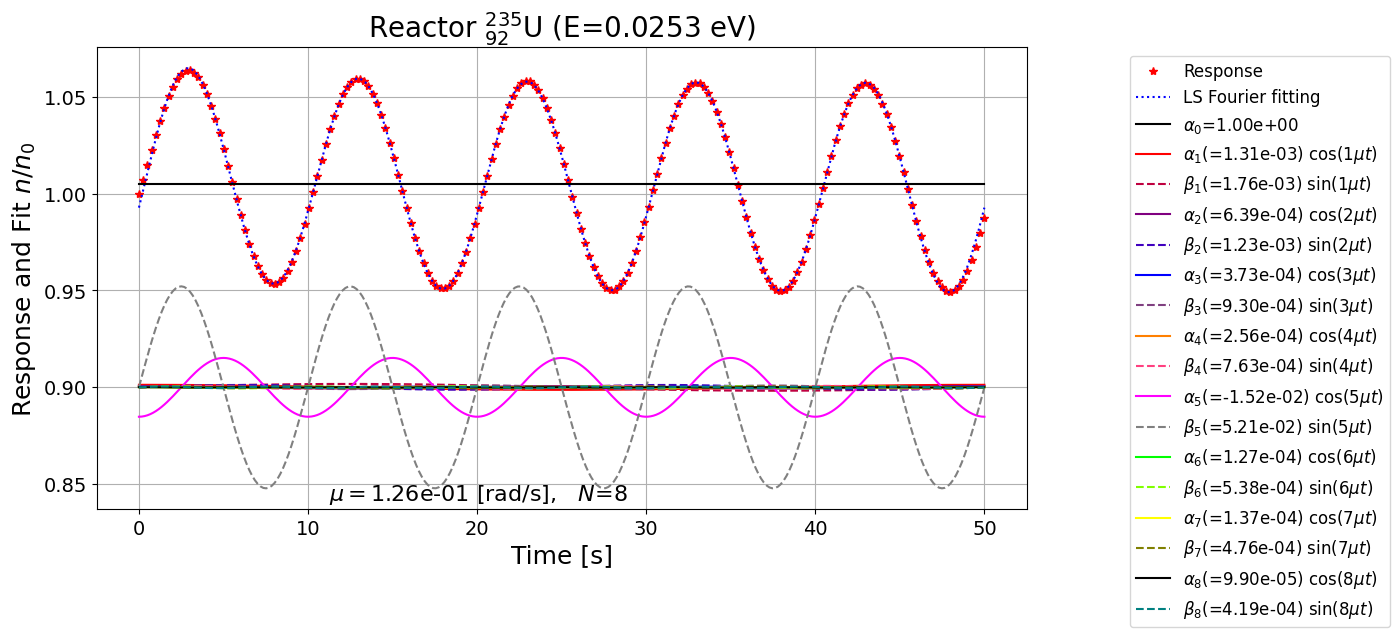

In [50]:
'''Plot the LS Fourier fit'''

plot_fourier_fit(time_stamps, u_vec_history[:,0]/params['n_0'], mu, x_vec, 
                 vert_offset=0.9, n_plot_pts=300, legend=True)

In [51]:
1/(5*mu/2/math.pi)

10.0

A rigorous frequency response analysis would continue to express the response (sine and cosine) as a single sinusoidal form with a combined amplitude and phase angle (phase shift). These two parameters are functions of the exciation frequency.

## Interactive Results <a id="ires"></a>
Here we can change the parameters interactively and compute the dynamics automatically.

In [ ]:
'''Create interactive plot'''
#from plotly import __version__
#print( __version__) # requires version >= 3.4.0

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools


fig = go.FigureWidget()
fig = tools.make_subplots(rows=2, cols=1, print_grid=False)

layout = go.Layout(title='Point-Reactor Model', 
         xaxis={'title':'Time [s]'}, 
         yaxis=dict(side='left',title='$n/n_0$',anchor='x'),
         xaxis2={'title':'Time [s]'}, 
         yaxis2=dict(side='left',title='$c_i/c_{i_0}',anchor='x2'),
                )

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'

In [ ]:
'''Vary number of modes'''

from ipywidgets import interact
import ipywidgets as widgets
@interact(time_final=widgets.FloatSlider(description=r'$t_{max}\,[\text{s}]$',value=50,min=1,max=500,step=10,readout_format='3.0f'),
          rho_over_beta=widgets.FloatSlider(description=r'$\rho/\beta=$',value=0.01,min=-0.1,max=0.1,step=0.01,readout_format='5.3f'), 
          gen_time=widgets.FloatSlider(description=r'$\ell\,[\text{s}]=$',value=1e-4,min=5e-6,max=1e-3,step=1e-4,readout_format='5.3e'),
          select=widgets.Dropdown(description='select:',value='Neutron Dens.',options=['Neutron Dens.', 'Delayed-Neutron Precur.','All']) 
         )
def update(time_final, rho_over_beta, gen_time, select):
    with fig.batch_update():
       
        n_time_stamps = params['n_time_stamps']
        params['time_final'] = time_final
        
        time_stamps = np.linspace(0.0, time_final, num=n_time_stamps)
        params['time_stamps'] = time_stamps
        
        beta = params['beta']
        params['reactivity'] = rho_over_beta * beta
        
        params['gen_time']   = gen_time
        
        setup_initial_conditions(params)
        
        history = run_point_reactor( f_vec, params )
        
        def plotly_neutron(fig,row=1):
            scatt = fig.add_scatter(name='$n/n_0$',mode='lines')
            scatt.x = time_stamps
            scatt.y = history[:,0]/params['n_0']
            scatt.xaxis='x'
            scatt.yaxis='y'
            scatt.line.color='red'
            fig.append_trace(scatt, row, 1) 
            fig['layout']['xaxis'].update(title='Time [s]', showgrid=True)
            fig['layout']['yaxis'].update(title='$n/n_0$', showgrid=True)
            fig['layout'].update(title='Point-Reactor Model Neutron Density')  
            return
        
        def plotly_precursors(fig,row=1):
            
            if row == 1:
                xaxis = 'xaxis'
                yaxis = 'yaxis'
            elif row == 2:
                xaxis = 'xaxis2'
                yaxis = 'yaxis2'
            else:
                assert False
            
            import matplotlib.pyplot as plt
            color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
            
            for (j,color_id) in zip( range(u_vec_history[:,1:].shape[1]), color_ids ):
                color = plt.cm.nipy_spectral(color_id)
                red_channel   = str(int(color[0]*255))
                green_channel = str(int(color[1]*255))
                blue_channel  = str(int(color[2]*255))
                color ='rgb('+red_channel+','+green_channel+','+blue_channel+')'
                label ='$c_%i/c_{%i_0}$'%(j+1,j+1)
                scatt = fig.add_scatter(name=label,mode='lines')
                scatt.line.color = color
                scatt.x = time_stamps
                scatt.y = u_vec_history[:,j+1]/params['c_vec_0'][j]
                
                if row==1:
                    scatt.xaxis='x'
                    scatt.yaxis='y'
                elif row==2:
                    scatt.xaxis='x2'
                    scatt.yaxis='y2'
                else:
                    assert False, 'not available.'
                    
                fig.append_trace(scatt, row, 1)
                fig['layout'].update(title='Delayed-Neutron Precursors')
                fig['layout'][xaxis].update(title='Time [s]', showgrid=True)
                fig['layout'][yaxis].update(title=r'$c_i/c_{i_0}$', showgrid=True)
                fig['layout'].update(title='Point-Reactor Model Delayed-Neutron Precursors')
            return
               
        if select == 'Neutron Dens.':
            fig.data = [] # clear the data stack          
            plotly_neutron(fig,row=1)
            
        elif select == 'Delayed-Neutron Precur.':
            fig.data = [] # clear the data stack
            plotly_precursors(fig,row=1)

        elif select == 'All':
            fig.data = [] # clear the data stack
            plotly_neutron(fig,row=1)
            plotly_precursors(fig,row=2)
  
        else:
            assert False, 'no other option; bail out'
            
    fig['layout'].update(height=900, width=950) 
    
    plotly.offline.iplot(fig)
    
    return

#plotly.offline.plot(fig, include_plotlyjs=False, output_type='div')